# Vaje 6: Ansambli

## Naloga 1: Rezanje dreves

In [1]:
import numpy as np

np.random.seed(18)
X = np.random.random(size=(1000, 9))
y = 1 + X[:, 0] - 2* X[:, 4] + 5 * (X[:, 3] * X[:, 4] - X[:, 5]*X[:, 8]) + np.random.normal(scale=5)
y = y > y.mean() 

1.a: Preveri točnost odločilnih dreves na napovednih spremenljivkah $X$ in ciljnih vrednostih $y$.

In [2]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
np.random.seed(42)

kfold = KFold(shuffle=True)
accuracies = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    x_train = X[train_idx]
    y_train = y[train_idx]
    x_test = X[test_idx]
    y_test = y[test_idx]
    model = DecisionTreeClassifier().fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {i}: accuracy {accuracy}")
    accuracies.append(accuracy)

print(np.mean(accuracies))

Fold 0: accuracy 0.89
Fold 1: accuracy 0.875
Fold 2: accuracy 0.875
Fold 3: accuracy 0.87
Fold 4: accuracy 0.835
0.8690000000000001


1.b: S sprotnim rezanjem poskrbi, da se naučen napovedn model ne bo preprilegal podatkom. Uporabi parameter `min_samples_split`, ki določi najmanjše število primerov v listu pri katerem se list naprej deli.

In [4]:
import matplotlib.pyplot as plt

Stop spliting when at most 2 instances in leafs 0.8800000000000001
Stop spliting when at most 3 instances in leafs 0.8800000000000001
Stop spliting when at most 4 instances in leafs 0.884
Stop spliting when at most 5 instances in leafs 0.882
Stop spliting when at most 10 instances in leafs 0.8790000000000001
Stop spliting when at most 20 instances in leafs 0.877
Stop spliting when at most 50 instances in leafs 0.859


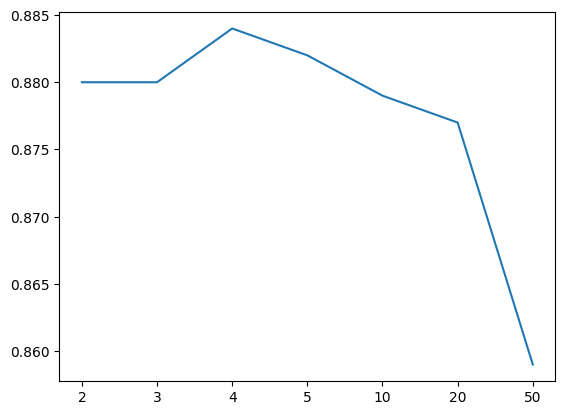

In [5]:
accuracies = []

for num_min_instances in [2, 3, 4, 5, 10, 20, 50]:
    scores = []
    np.random.seed(18)
    kfold = KFold(shuffle=True)
    
    for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
        x_train = X[train_idx]
        y_train = y[train_idx]
        x_test = X[test_idx]
        y_test = y[test_idx]
        model = DecisionTreeClassifier(min_samples_split=num_min_instances).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        # print(f"Fold {i}: accuracy {accuracy}")
        scores.append(accuracy)

    print(f"Stop spliting when at most {num_min_instances} instances in leafs", np.mean(scores))
    accuracies.append(np.mean(scores))
    
plt.plot(accuracies)
plt.xticks(list(range(7)),labels=[2, 3, 4, 5, 10, 20, 50])
plt.show()

1.c: Najdi ustrezno vrednost parametra cp (`ccp_alpha` v sklearn) za naknadno rezanje odločitvenega drevesa.

CP parameter 0 0.8779999999999999
CP parameter 0.01 0.86
CP parameter 0.02 0.841
CP parameter 0.05 0.8149999999999998
CP parameter 0.1 0.8149999999999998
CP parameter 0.2 0.5439999999999999
CP parameter 0.5 0.5439999999999999
CP parameter 1 0.5439999999999999


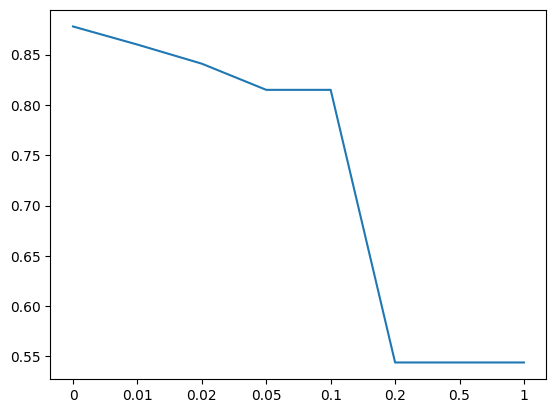

In [6]:
accuracies = []

for cp in [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]:
    scores = []
    np.random.seed(10)
    kfold = KFold(shuffle=True)

    for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
        x_train = X[train_idx]
        y_train = y[train_idx]
        x_test = X[test_idx]
        y_test = y[test_idx]
        model = DecisionTreeClassifier(ccp_alpha=cp).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)

    print(f"CP parameter {cp}", np.mean(scores))
    accuracies.append(np.mean(scores))
    
plt.plot(accuracies)
plt.xticks(list(range(8)),labels=[0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1])
plt.show()

## Naloga 2: Naključni gozd

2.a: Na podatkih iz naloge 1 preizkusi točnost napovednega modela naključnega gozda. Preveri še kako dobro lahko točnost preverimo na OOB množici (parameter `oob_score` in atribut `oob_score_`).

<details>
  <summary>Namig:</summary>

  *Pomagaj si z [modelom sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
   
</details>

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
np.random.seed(42)

kfold = KFold(shuffle=True)
accuracies = []
oob_scores = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    x_train = X[train_idx]
    y_train = y[train_idx]
    x_test = X[test_idx]
    y_test = y[test_idx]
    # oob_score parameter moramo nastaviti na True
    model = RandomForestClassifier(oob_score=True).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {i}: accuracy {accuracy}")
    # Izpišemo OOB score
    print(f"Fold {i}: OOB score {model.oob_score_}")
    print()
    accuracies.append(accuracy)
    oob_scores.append(model.oob_score_)

print(np.mean(accuracies))
print(np.mean(oob_scores))

Fold 0: accuracy 0.94
Fold 0: OOB score 0.91125

Fold 1: accuracy 0.945
Fold 1: OOB score 0.92

Fold 2: accuracy 0.9
Fold 2: OOB score 0.92625

Fold 3: accuracy 0.945
Fold 3: OOB score 0.9175

Fold 4: accuracy 0.95
Fold 4: OOB score 0.92375

0.9359999999999999
0.91975


2.b: Nariši grafa, ki prikazujeta kako se točnost (in točnost na OOB množici) spreminjajo glede na število dreves (`n_estimators`) in parameter mtry (`max_features`)

/home/sebastian/miniconda3/envs/ITAP24/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/sebastian/miniconda3/envs/ITAP24/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/sebastian/miniconda3/envs/ITAP24/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/sebastian/miniconda3/envs/ITAP24/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/sebastian/miniconda3/envs/ITAP

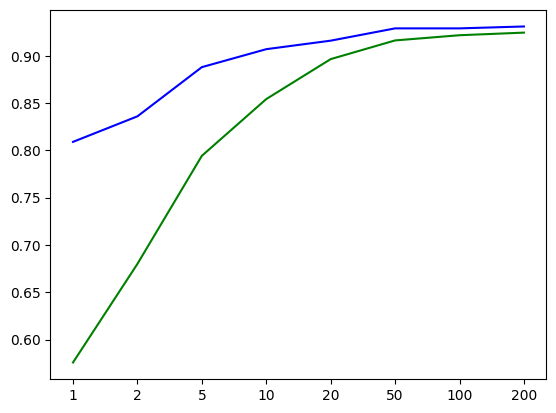

In [9]:
accuracies = []
oobs = []

for num_trees in [1, 2, 5, 10, 20, 50, 100, 200]:
    scores = []
    oob_scores = []
    
    np.random.seed(10)
    kfold = KFold(shuffle=True)
    
    for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
        x_train = X[train_idx]
        y_train = y[train_idx]
        x_test = X[test_idx]
        y_test = y[test_idx]
        model = RandomForestClassifier(n_estimators=num_trees, oob_score=True).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        oob_scores.append(model.oob_score_)
        scores.append(accuracy)

    oobs.append(np.mean(oob_scores))
    accuracies.append(np.mean(scores))
    
plt.plot(accuracies, c="b")
plt.plot(oobs, c="g")
plt.xticks(list(range(8)),labels=[1, 2, 5, 10, 20, 50, 100, 200])
plt.show()

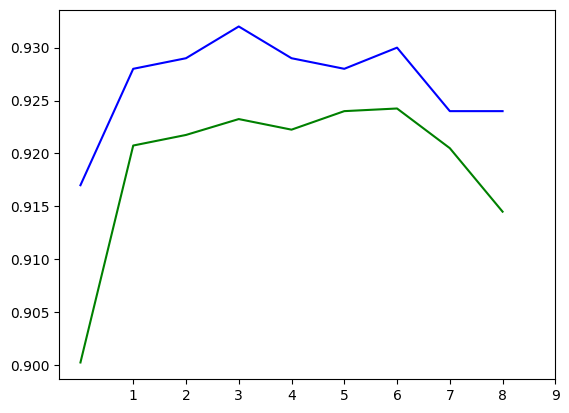

In [10]:
accuracies = []
oobs = []

for num_trees in range(1, 10):
    scores = []
    oob_scores = []
    np.random.seed(10)
    kfold = KFold(shuffle=True)
    
    for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
        x_train = X[train_idx]
        y_train = y[train_idx]
        x_test = X[test_idx]
        y_test = y[test_idx]
        model = RandomForestClassifier(max_features=num_trees, oob_score=True).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        oob_scores.append(model.oob_score_)
        scores.append(accuracy)

    oobs.append(np.mean(oob_scores))
    accuracies.append(np.mean(scores))
    
plt.plot(accuracies, c="b")
plt.plot(oobs, c="g")
plt.xticks(list(range(1, 10)))
plt.show()

2.c: Natreniraj model naključnega gozda na vseh podatkih, preveri njegovo točnost na OOB množici in poglej relevantnost spremenljivk (atribut `feature_importances_`). Se relevantnost spremenljivk ujema z definicijo ciljne funkcije $1 + X_1 - 2* X_5 + 5 * (X_4 * X_5 - X_6*X_9)$?

In [11]:
model = RandomForestClassifier(oob_score=True).fit(X, y)
print(f"Accuracy on OOB set: {model.oob_score_}")
for i in range(len(model.feature_importances_)):
    print(f"Feature {i+1}, importance {model.feature_importances_[i]}")

Accuracy on OOB set: 0.931
Feature 1, importance 0.05835875148868243
Feature 2, importance 0.027168335802828823
Feature 3, importance 0.03227660143394814
Feature 4, importance 0.19354683841382087
Feature 5, importance 0.06816363639653537
Feature 6, importance 0.27363613127897757
Feature 7, importance 0.0345539669957683
Feature 8, importance 0.03085062607964304
Feature 9, importance 0.2814451121097956


## Naloga 3: Vrečenje (Bagging)

3.a: Preizkusi model vrečenja z modelom odločitvenega drevesa. Kako se model primerja z modelom naključnega gozda?

In [12]:
from sklearn.ensemble import BaggingClassifier

In [13]:
np.random.seed(42)

kfold = KFold(shuffle=True)
accuracies = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    x_train = X[train_idx]
    y_train = y[train_idx]
    x_test = X[test_idx]
    y_test = y[test_idx]
    model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {i}: accuracy {accuracy}")
    accuracies.append(accuracy)

print("Mean accuracy", np.mean(accuracies))

Fold 0: accuracy 0.925
Fold 1: accuracy 0.92
Fold 2: accuracy 0.89
Fold 3: accuracy 0.93
Fold 4: accuracy 0.965
Mean accuracy 0.9260000000000002


3.b: Na podoben način lahko vrečimo tudi druge modele. Preveri točnost ansambla, ki ga sestavimo iz modelov podpornih vektorjev?

In [14]:
from sklearn.svm import SVC

In [15]:
np.random.seed(42)

kfold = KFold(shuffle=True)
accuracies = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    x_train = X[train_idx]
    y_train = y[train_idx]
    x_test = X[test_idx]
    y_test = y[test_idx]
    model = BaggingClassifier(estimator=SVC(), n_estimators=100).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {i}: accuracy {accuracy}")
    accuracies.append(accuracy)

print("Mean accuracy", np.mean(accuracies))

Fold 0: accuracy 0.93
Fold 1: accuracy 0.955
Fold 2: accuracy 0.95
Fold 3: accuracy 0.945
Fold 4: accuracy 0.965
Mean accuracy 0.9490000000000001
